# Honolulu Climate Analysis

In [ ]:
# Plotting tools
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Python Data Tools
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

### Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [7]:
# View the classes found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

### Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date_row = session.query(Measurement.date).\
                            order_by(Measurement.date.desc()).first()
print(most_recent_date_row)

('2017-08-23',)


##### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [12]:
# Get the one year ago date using the most recent date recorded in the database
most_recent_date = dt.datetime.strptime(most_recent_date_row[0], '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [13]:
# Query a list of "date" and "prcp" values over the last year.
data_and_precip = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > one_year_ago).\
                order_by(Measurement.date).all()
    
# Load the list into a Pandas DataFrame. 
data_and_precip_df = pd.DataFrame(data_and_precip)
# Explicitly setting the column names.
data_and_precip_df = data_and_precip_df.rename(columns={'date': 'Date', 'prcp': 'Precipitation'})

# Sort the DataFrame values by "date" and set date as the index. Also drop NA values.
data_and_precip_plot_df = data_and_precip_df.sort_values(by='Date').dropna()
data_and_precip_plot_df = data_and_precip_plot_df.set_index('Date')
data_and_precip_plot_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


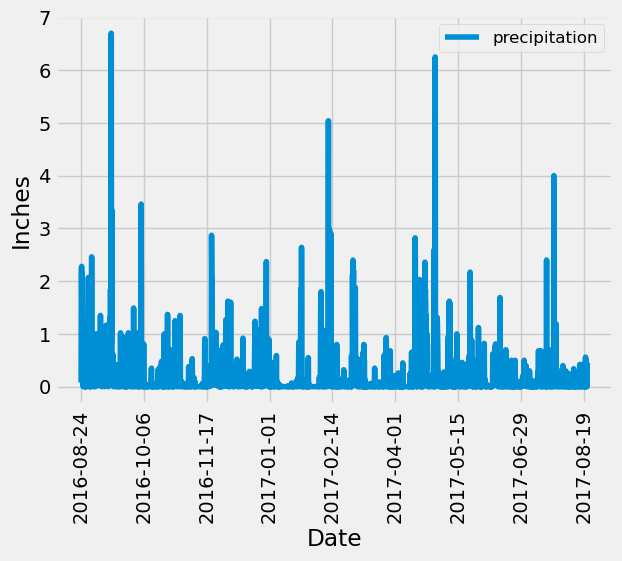

In [48]:
# Plot the results by using the DataFrame plot method
precip_plot = data_and_precip_plot_df.plot(xlabel='Date', ylabel='Inches', rot=90).legend(['precipitation'], fontsize=12, loc='upper right')


In [49]:
# Use Pandas to print the summary statistics for the precipitation data
data_and_precip_plot_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [54]:
# Query the total number of stations in the dataset.
total_stations = session.query(Station.station).count()
print(f"Total stations: {total_stations}")


Total stations: 9


In [67]:
# Query the most active stations (the stations that have the most rows)
# List the stations and observation counts in descending order

station_activity = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all() 

print(f"{station_activity}\n")
print(f"Station '{station_activity[0][0]}' had the greatest number of observations.")

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]

Station 'USC00519281' had the greatest number of observations.


In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_number = station_activity[0][0]

low_high_average_temperatures = session.query(func.min(Measurement.tobs),
                                    func.max(Measurement.tobs),
                                    func.avg(Measurement.tobs)).\
                                    filter(Measurement.station == top_station_number).all()

print(f"Lowest Temperature = {low_high_average_temperatures[0][0]}\n")
print(f"Highest Temperature = {low_high_average_temperatures[0][1]}\n")
print(f"Average Temperature = {low_high_average_temperatures[0][2]}")


Lowest Temperature = 54.0

Highest Temperature = 85.0

Average Temperature = 71.66378066378067


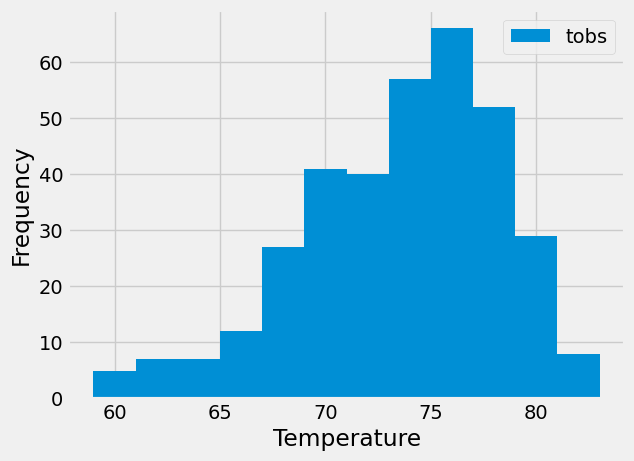

In [84]:
# Using the most active station id -
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Station with the greatest number of observations
top_station_number = station_activity[0][0]

# Query 12 months TOB for the top station
one_year_temperature_observation = session.query(Measurement.date, Measurement.tobs).\
                                filter(Measurement.date > one_year_ago).\
                                filter(Measurement.date <= most_recent_date).\
                                filter(Measurement.station == top_station_number)

# Create a DataFrame from the query
one_year_temperature_observation_df = pd.DataFrame(one_year_temperature_observation)

# Plot Histogram
one_year_temperature_observation_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [85]:
# Close Session
session.close()